<a href="https://colab.research.google.com/github/shriju/CNN/blob/main/cat_vs_dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 246MB/s]
100% 1.06G/1.06G [00:04<00:00, 262MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [24]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
# Normalize
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [26]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.3751 - accuracy: 0.5860 - val_loss: 0.6399 - val_accuracy: 0.6658
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5652 - accuracy: 0.7110 - val_loss: 0.5180 - val_accuracy: 0.7526
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4706 - accuracy: 0.7765 - val_loss: 0.6790 - val_accuracy: 0.6544
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4221 - accuracy: 0.8083 - val_loss: 0.4736 - val_accuracy: 0.7744
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3548 - accuracy: 0.8445 - val_loss: 0.5452 - val_accuracy: 0.7578
Epoch 6/10
625/625 [==============================] - 70s 111ms/step - loss: 0.2767 - accuracy: 0.8832 - val_loss: 0.5757 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2032 - accuracy: 0.9172 - val_loss: 0.6902 - val_ac

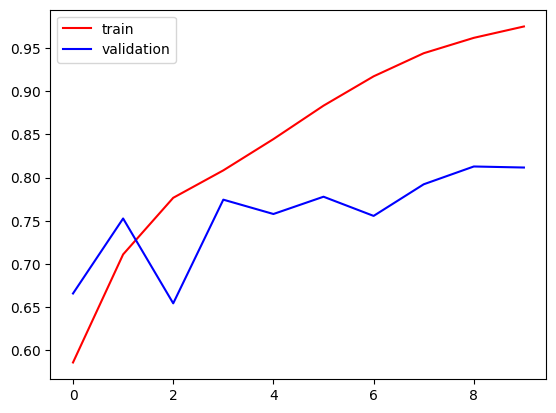

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

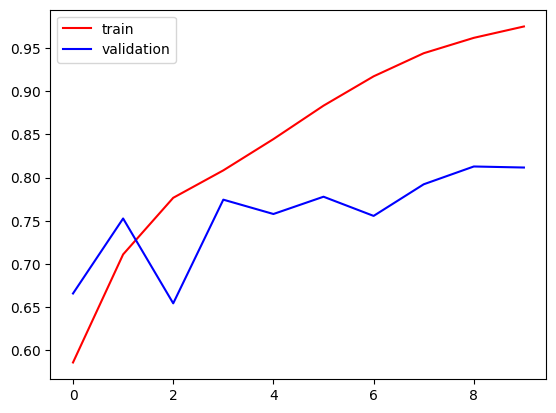

In [31]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

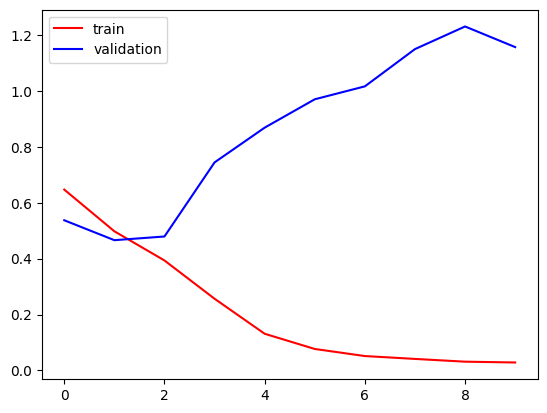

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

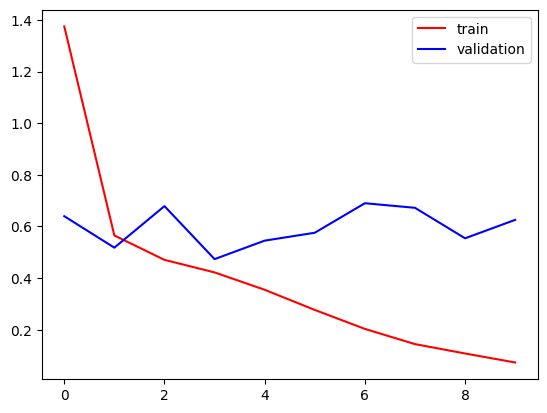

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [33]:
import cv2

In [54]:
test_img = cv2.imread('/content/dog.jpg')

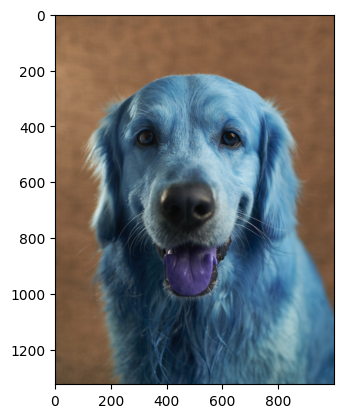

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(1325, 1000, 3)

In [57]:
test_img = cv2.resize(test_img,(256,256))

In [58]:
test_input = test_img.reshape((1,256,256,3))

In [59]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)